In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Считываем данные

In [2]:
data = pd.read_csv("custom_dataset.csv");

In [3]:
data

,Unnamed: 0,feature_1,feature_2,target
0,0,0.027957,0.856195,0
1,1,-0.452472,0.880457,0
2,2,0.006996,0.815738,0
3,3,-0.721376,0.992746,0
4,4,-0.104573,0.831477,0
...,...,...,...,...
4091,4091,-1.221635,0.198798,0
4092,4092,-0.977941,0.322820,0
4093,4093,-1.057066,0.523053,0
4094,4094,-0.219786,0.081848,1


In [4]:
npdata = np.array(data)

In [5]:
line = np.linspace(-1.5,2.5,int(4/.01));

Визуализируем, подгоняем преобразование

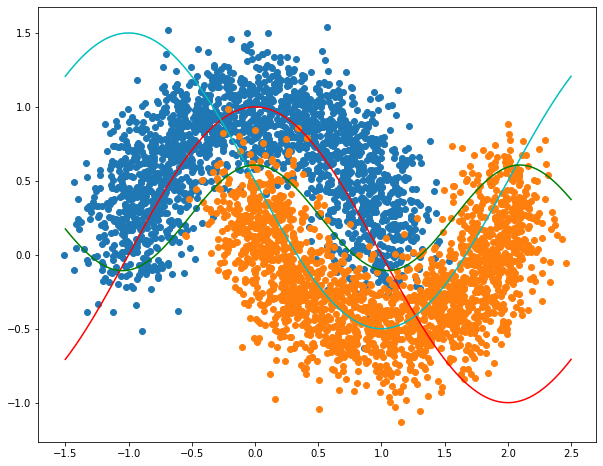

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
group = npdata[:,3]

ax.scatter(npdata[:,1][group==0],npdata[:,2][group==0])
ax.scatter(npdata[:,1][group==1],npdata[:,2][group==1])
ax.plot(line, np.cos(line*np.pi/2), 'r')
ax.plot(line,-np.sin(line*np.pi/2)+.5, 'c')
ax.plot(line, np.cos(line*3)/2.8+.25, 'g')

Подогнали:

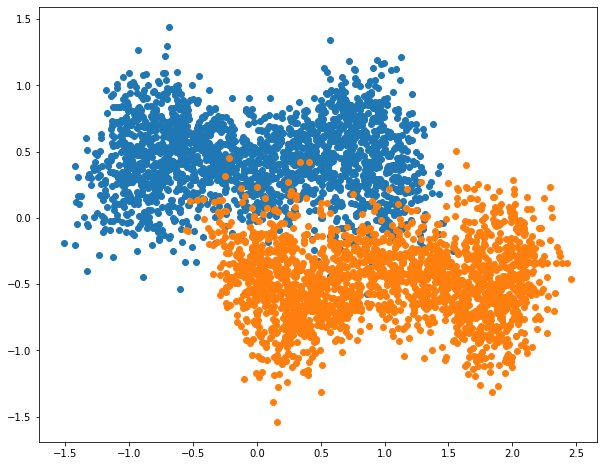

In [7]:
npdata2 = np.copy(npdata)
bias = -(np.cos(npdata2[:,1]*3)/2.8+.25)
npdata2[:,2] += bias


fig,ax = plt.subplots(1,1,figsize=(10,8))

ax.scatter(npdata2[:,1][group==0],npdata2[:,2][group==0])
ax.scatter(npdata2[:,1][group==1],npdata2[:,2][group==1])

In [8]:
from sklearn.svm import SVC


SVM, исходный массив:

In [9]:
X = npdata[:,(1,2)]
y = npdata[:,3]
model = SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

C:\Users\battl\AppData\Local\Temp/ipykernel_19664/665970568.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


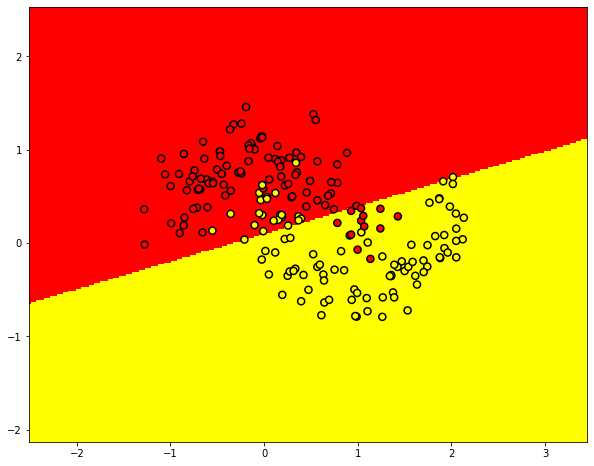

In [10]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

predicted = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

SVM, исходный массив:

SVM, "подогнанный" массив:

In [11]:
X = npdata2[:,(1,2)]
y = npdata2[:,3]
model2 = SVC(kernel='linear')
model2.fit(X,y)

SVC(kernel='linear')

C:\Users\battl\AppData\Local\Temp/ipykernel_19664/269431204.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


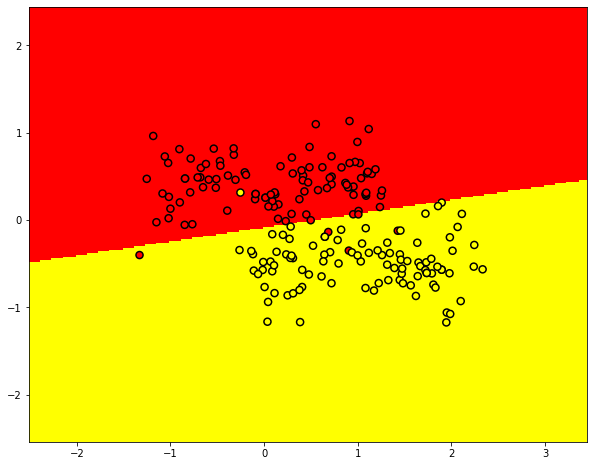

In [12]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

predicted = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

In [80]:
class kNN:
    def __init__(self, k=1, norm=None):
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        return
        
    def predict(self, X):
        ret = np.empty(X.shape[0])
        for i in range(0,X.shape[0]):
            y_temp = np.copy(self.y)
            point = np.tile(X[i,:], (self.X.shape[0],1))
            diff = self.X - point
            dist = np.linalg.norm(diff, axis=1)
            args = np.argsort(dist)
            v, c = np.unique(y_temp[args[0:self.k]], return_counts=True)
            ret[i] = v[c.argmax()]
        return ret
        

kNN, исходный массив:

In [81]:
X = npdata[:,(1,2)]
y = npdata[:,3]
model3 = kNN(4)
X_train = X[200:,:]
X_test = X[0:200,:]
y_train = y[200:]
y_test = y[0:200]
model3.fit(X_train,y_train)

C:\Users\battl\AppData\Local\Temp/ipykernel_19664/3650566117.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


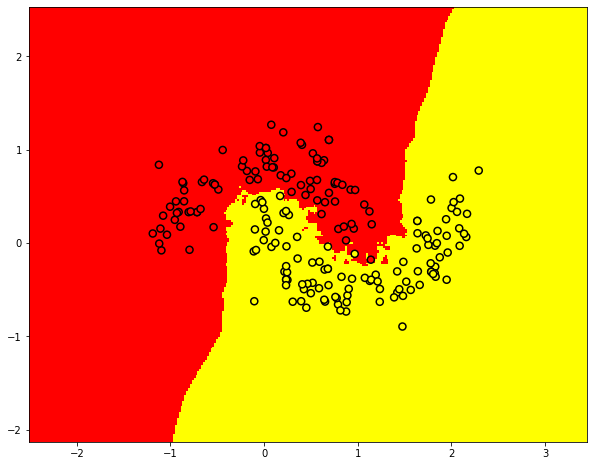

In [82]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

predicted = model3.predict(np.c_[xx.ravel(), yy.ravel()])
predicted = predicted.reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

kNN, "подогнанный" массив:

In [83]:
X = npdata2[:,(1,2)]
y = npdata2[:,3]
model3 = kNN(4)
X_train = X[200:,:]
X_test = X[0:200,:]
y_train = y[200:]
y_test = y[0:200]
model3.fit(X_train,y_train)

C:\Users\battl\AppData\Local\Temp/ipykernel_19664/3600894570.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


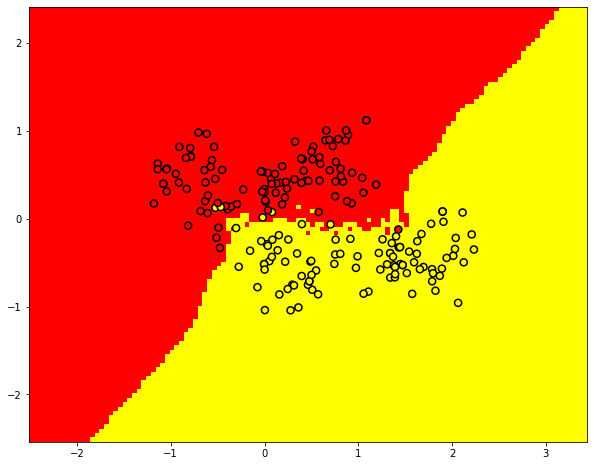

In [84]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

predicted = model3.predict(np.c_[xx.ravel(), yy.ravel()])
predicted = predicted.reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)